# Make a theta-square plot

This is a basic example to analyze some events and make a $\Theta^2$ plot

In [1]:
%matplotlib inline

In [2]:
from astropy import units as u
from astropy.coordinates.angle_utilities import angular_separation
from astropy.coordinates import SkyCoord, AltAz

import matplotlib.pyplot as plt
import numpy as np

from ctapipe.io import EventSource

from ctapipe.calib import CameraCalibrator
from ctapipe.image import ImageProcessor
from ctapipe.reco import ShowerProcessor

from tqdm.auto import tqdm

Get source events in MC dataset. 

In [3]:
source = EventSource(
    "dataset://gamma_prod5.simtel.zst",
#     allowed_tels={1, 2, 3, 4},
)

subarray = source.subarray

calib = CameraCalibrator(subarray=subarray)
image_processor = ImageProcessor(subarray=subarray)
shower_processor = ShowerProcessor(subarray=subarray)

In [4]:
off_angles = []

for event in tqdm(source):

    # calibrating the event
    calib(event)
    image_processor(event)
    shower_processor(event)

    reco_result = event.dl2.stereo.geometry['HillasReconstructor']

    # get angular offset between reconstructed shower direction and MC
    # generated shower direction
    true_shower = event.simulation.shower
    off_angle = angular_separation(true_shower.az, true_shower.alt, reco_result.az, reco_result.alt)

    # Appending all estimated off angles
    off_angles.append(off_angle.to(u.deg).value)

0it [00:00, ?it/s]

calculate theta square for angles which are not nan

In [5]:
off_angles = np.array(off_angles)
thetasquare = off_angles[np.isfinite(off_angles)]**2

## Plot the results

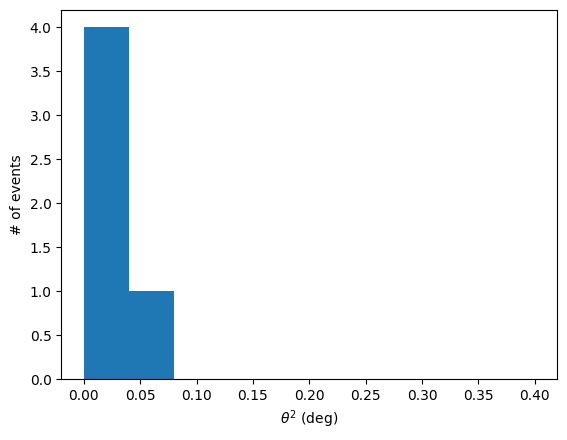

In [6]:
plt.hist(thetasquare, bins=10, range=[0, 0.4])
plt.xlabel(r'$\theta^2$ (deg)')
plt.ylabel("# of events")
plt.show()